# This Machine Learning Model will look through a diagnostic description dataset and make a prediction as to whether or not the given information represents high likeliness for a cancer diagnosis.


# Import Libraries


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#import our dataset

cancer_df = pd.read_csv("/content/Cancer_Data.csv")
cancer_df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [47]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Dataset Info

In [48]:
#number of rows and columns
cancer_df.shape


(569, 33)

In [49]:
#all of our dataset's feature listed here
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Our target variable is 'diagnosis'.
# We have 33 columns or 'features'
# Within this dataset, diagnosis is either 'M' for malignant or 'B' for benign.
# We will work through this as a binary classification problem.

In [50]:
#let's check how many benign and malignant diagnoses there are
cancer_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# We have a total of 357 Benign diagnoses and 212 Malignant ones within this dataset.

# Checking for null values

In [51]:
cancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# No null values, however Unnamed: 32 column seems to have all NaN values, so it will be removed from training data

# Let's change the diagnostic data into numerical format to be able to more easily plot and explore the data

In [52]:
cancer_df['diagnosis'].replace(['B', 'M'], [0, 1], inplace = True)

In [53]:
# B --> 0, M --> 1
cancer_df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Exploratory Analysis

<Axes: title={'center': 'Benign vs Malignant Diagnoses against Radius Mean'}, xlabel='diagnosis', ylabel='radius_mean'>

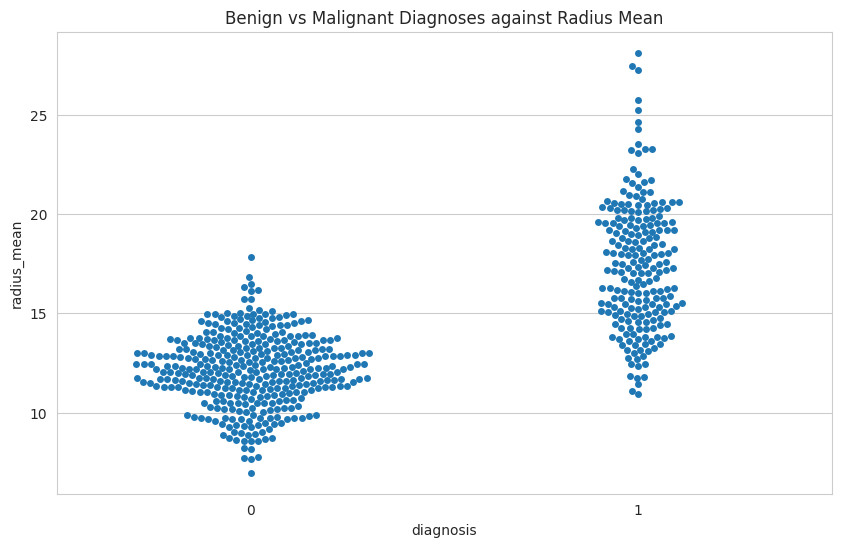

In [54]:
# Using a categorical scatter plot to give a clear look into the effect of radius mean on diagnoses
#based on diagnosis from 0 to one and radius mean

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.title("Benign vs Malignant Diagnoses against Radius Mean")

sns.swarmplot(x = cancer_df['diagnosis'], y = cancer_df['radius_mean'])


# Looking at the diagnoses as compared to the radius mean, we can see that on average, masses diagnosed as malignent tend to have a higher radius mean than those diagnosed as benign.
#We see this in the following table, where 'radius_mean' is significantly higher in malignant masses:


In [55]:
cancer_df.groupby('diagnosis')[['radius_mean']].mean()

,radius_mean
diagnosis,
0,12.146524
1,17.462830


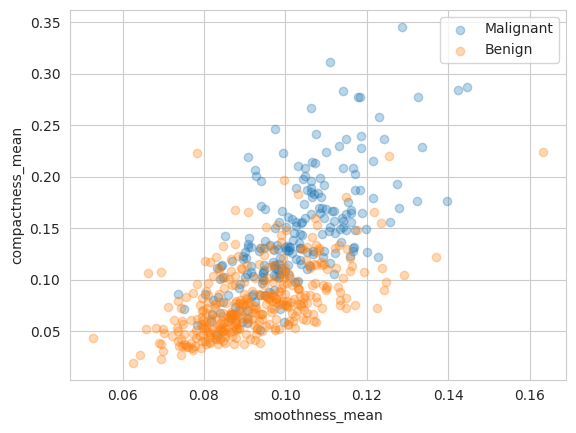

In [56]:
M = cancer_df[cancer_df.diagnosis == 1] #Diagnosis transfers all values of M to M data
B = cancer_df[cancer_df.diagnosis == 0] #Diagnosis transfers all values of B to B data

plt.scatter(M.smoothness_mean,M.compactness_mean, label = "Malignant", alpha = 0.3)
plt.scatter(B.smoothness_mean,B.compactness_mean,label = "Benign", alpha = 0.3)

plt.xlabel("smoothness_mean")
plt.ylabel("compactness_mean")

plt.legend()
plt.show()

# From the plot we can see that Benign cells are much less compact and much less smooth than Malignant cells. There is some crossover however.

In [57]:
cancer_df.groupby('diagnosis')[['smoothness_mean','compactness_mean']].mean()

,smoothness_mean,compactness_mean
diagnosis,,
0,0.092478,0.080085
1,0.102898,0.145188


# Smoothness mean for both benign and malignant seem to have less correlation to each other. However, compactness is much higher in malignant cells throughout.

# Model Building with SGD

In [58]:
#first drop Unnamed and id column for accurate training data
cancer_df = cancer_df.drop(labels="Unnamed: 32", axis=1)
cancer_df = cancer_df.drop(labels="id", axis=1)

In [59]:
cancer_df.shape

(569, 31)

In [60]:
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
from sklearn.model_selection import train_test_split

X, y = cancer_df.drop('diagnosis', axis=1), cancer_df[['diagnosis']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=43, stratify=y)

In [136]:
#import and build out model
from tensorflow import keras
from tensorflow.keras import layers

#changed unit amount from 512 to 64
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[30]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=200,
    callbacks=[early_stopping],
    verbose=1, # hide with verbose=0 b/c of large epoch size
)

Epoch 1/200
3/3 [==============================] - 1s 118ms/step - loss: 8.3163 - binary_accuracy: 0.4777 - val_loss: 3.3332 - val_binary_accuracy: 0.5372
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 2.7840 - binary_accuracy: 0.6877 - val_loss: 2.0083 - val_binary_accuracy: 0.7394
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 1.5684 - binary_accuracy: 0.7638 - val_loss: 3.1973 - val_binary_accuracy: 0.5532
Epoch 4/200
3/3 [==============================] - 0s 20ms/step - loss: 2.1037 - binary_accuracy: 0.6588 - val_loss: 0.4857 - val_binary_accuracy: 0.8883
Epoch 5/200
3/3 [==============================] - 0s 29ms/step - loss: 1.1402 - binary_accuracy: 0.8609 - val_loss: 1.3734 - val_binary_accuracy: 0.8670
Epoch 6/200
3/3 [==============================] - 0s 42ms/step - loss: 1.2337 - binary_accuracy: 0.8714 - val_loss: 0.6629 - val_binary_accuracy: 0.8723
Epoch 7/200
3/3 [==============================] - 0s 29ms/step - loss: 0.9

# Checking for Noise, Over/Underfitting

Minimum validation loss: 0.20071902871131897


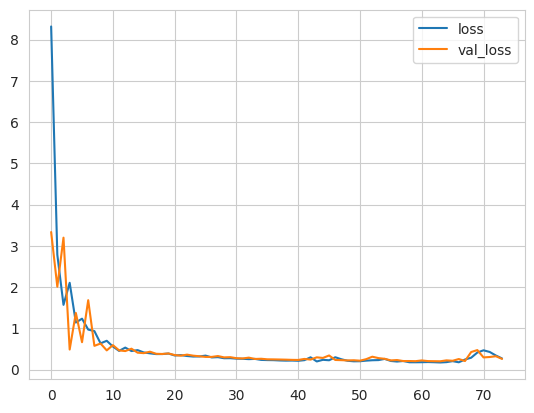

In [137]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# We've gotten our model to about 91% accuracy on our validation data by lowering our units from 512 to 64, as well as lowering epoch and batch size.